# Statistiques

Dans ce TP, nous utiliserons plusieurs fonction de numpy et scipy. En particulier : 
* Distribution aléatoire : package numpy.random, fonctions rad, normal. En général ces fonctions ont un paramètre size qui permet de faire un grand nombres de tirages. Il est aussi possible de leur envoyer un tableau de paramètre.
* Histogramme : on pourra utiliser la fonction numpy.histogram ou la fonction matplotlib.pyplot.hist. Il est important d’utiliser l’argument optionel bins en mettant une séquence. Par exemple numpy.histogram(data,
bins=(a,b)) calcule le nombre de point entre a et b.


# Estimateur
## Loi normale

On considère une variable aléatoire distribuée selon une loi normale d'écart type $\sigma$ et de centre $\mu$:
$$ P(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

On considère un échantillon de $N$ réalisations de la loi : $x_i$. 

La vraissemblance est donnée par :
$$\mathcal L(\mu, \sigma; x_i) = \prod_i P(x_i; \mu, \sigma) $$

Plutôt que de maximiser la vraissemblance, on va minimiser $-\ln\mathcal L$. 
Démontrer que la maximum est obtenu avec :
$$\hat\mu = \frac{1}{N}\sum_ix_i$$
et
$$\hat\sigma = \frac{1}{N}\sum_i(x_i-\hat\mu)^2$$

Les estimateurs que l'on a obtenus pour l'espérance $\mu$ et pour l'écart type $\sigma$ de la loi sont donnés par la moyenne et l'écart type des points. 

1. Écrire les fonctions $\hat\sigma$ et $\hat\mu$

2. Un estimateur est caractérisé par son biais et son écart type. Calculer numériquement le biais et l'écart de ces estimateurs pour $N=10$ et $N=100$ (pour $\mu=0$ et $\sigma=1$). Ce calcul se fera en simulant un nombre $M$ de fois l'estimateur (typiquement M=100000). Sont ils biaisé ? Semblent-ils convergent ? 

## Loi uniforme
On considère une loi uniforme entre $a$ et $b$ ($b>a$). L'espérance de cette loi est $\mu = (a+b)/2$. On note $L=b-a$ (largeur de l'intervale). L'écart type est proportionnel à $L$ et on peut montrer qu'il vaut $\frac{L}{2\sqrt{3}}$. 

3. Caractériser pour cette loi l'estimateur de $\mu$ donné par la moyenne et de $L$ donné, au facteur $2\sqrt{3}$ près par l'écart type. On prendra $N=10$ et $N=100$.

4. Démontrer que $\mathcal L(a, b; x_i) = \frac1{(b-a)^N}$ si $a\leq \min x_i$ et $b\geq \max x_i$ et 0 sinon. En déduire que le maximum de vraissemblance conduit à :
$$\hat a = \min x_i$$ et $$\hat b = \max x_i$$ soit $$\hat\mu = (\max x_i + \min x_i)/2$$ et $$\hat L = (\max x_i - \min x_i)$$. 

5. Caractériser ces deux estimateurs. 

6. Comparez graphiquement l'écart type des deux estimateurs de $\mu$ pour $N$ entre $10$ et $1000$

7. A l'aide d'un histogramme, comparez pour $N=20$ la distribution de ces deux estimateurs. 

In [1]:
import numpy as np

In [2]:
def hat_mu(x):
    return np.mean(x, axis=0)

def hat_sigma(x):
    return np.std(x, axis=0)

In [3]:
N = 10
for N in [10, 100]:
    M = 1000000
    X = np.random.normal(size=(N, M))

    print(f'Caracterisation de hat_mu : N={N}')
    print('Biais', np.mean(hat_mu(X)))
    print('écart type', np.std(hat_mu(X)))
    print('')
    print(f'Caracterisation de hat_sigma : N={N}')
    print('Biais', np.mean(hat_sigma(X))-1)
    print('écart type', np.std(hat_sigma(X)))
    print('')

Caracterisation de hat_mu : N=10
Biais 0.0002913819745143336
écart type 0.31623317324628963

Caracterisation de hat_sigma : N=10
Biais -0.07738506246073462
écart type 0.2200744091044941

Caracterisation de hat_mu : N=100
Biais -5.804555178150796e-05
écart type 0.1001151785066101

Caracterisation de hat_sigma : N=100
Biais -0.00756421093694104
écart type 0.07061387776409697



In [4]:
# On observe que l'écart type est biaisé. Cela reste tout de même un estimateur convergent

In [5]:
def hat_mu_simple(X):
    return np.mean(X, axis=0)

def hat_L_simple(X):
    return 2*np.sqrt(3)*np.std(X, axis=0)

In [6]:
N = 10
for N in [10, 100]:
    M = 1000000
    X = np.random.rand(N, M) - .5

    print(f'Caracterisation de hat_mu : N={N}')
    print('Biais', np.mean(hat_mu_simple(X)))
    print('écart type', np.std(hat_mu_simple(X)))
    print('')
    print(f'Caracterisation de hat_sigma : N={N}')
    print('Biais', np.mean(hat_L_simple(X))-1)
    print('écart type', np.std(hat_L_simple(X)))
    print('')



Caracterisation de hat_mu : N=10
Biais 5.5450436630095685e-05
écart type 0.09132418008345082

Caracterisation de hat_sigma : N=10
Biais -0.06415493493565971
écart type 0.15603578474556912

Caracterisation de hat_mu : N=100
Biais 1.2133559568714324e-05
écart type 0.028889648975257875

Caracterisation de hat_sigma : N=100
Biais -0.006022875261366134
écart type 0.045155301943174214



In [7]:
def hat_mu_like(X):
    return (np.max(X, axis=0) + np.min(X, axis=0))/2

def hat_L_like(X):
    return (np.max(X, axis=0) - np.min(X, axis=0))


In [8]:
N = 10
for N in [10, 100]:
    M = 1000000
    X = np.random.rand(N, M) - .5

    print(f'Caracterisation de hat_mu : N={N}')
    print('Biais', np.mean(hat_mu_like(X)))
    print('écart type', np.std(hat_mu_like(X)))
    print('')
    print(f'Caracterisation de hat_sigma : N={N}')
    print('Biais', np.mean(hat_L_like(X))-1)
    print('écart type', np.std(hat_L_like(X)))
    print('')



Caracterisation de hat_mu : N=10
Biais -6.200493077097695e-05
écart type 0.06159534440122322

Caracterisation de hat_sigma : N=10
Biais -0.1819872276177218
écart type 0.11138487516145998

Caracterisation de hat_mu : N=100
Biais 7.21259168349422e-07
écart type 0.006952467491960569

Caracterisation de hat_sigma : N=100
Biais -0.019791737076621962
écart type 0.013774146790713603



In [9]:
TN = [10, 20, 50, 100, 200, 500, 1000]
out = []
for N in TN:
    M = 100000
    X = np.random.rand(N, M) - .5

    out.append((N,
               np.std(hat_mu_simple(X)),
               np.std(hat_mu_like(X))))
out = np.array(out)

In [10]:
%matplotlib inline
from matplotlib.pyplot import figure

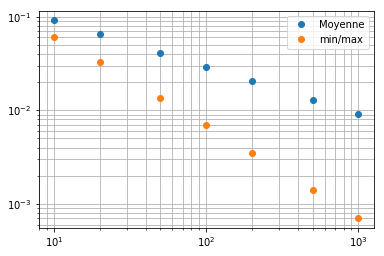

In [11]:
fig = figure()
ax = fig.subplots(1, 1)

ax.loglog(out[:,0], out[:,1], 'o', label='Moyenne')
ax.loglog(out[:,0], out[:,2], 'o', label='min/max')

ax.legend()
ax.grid(which='both')

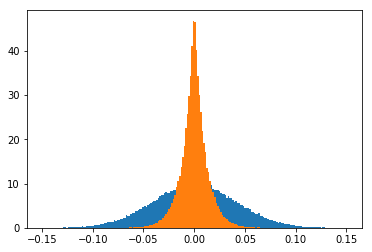

In [12]:
N = 50
M = 100000

X = np.random.rand(N, M) - .5
fig = figure()
ax = fig.subplots(1, 1)

ax.hist(hat_mu_simple(X), bins=np.linspace(-0.15, 0.15, 201), density=True);
ax.hist(hat_mu_like(X), bins=np.linspace(-0.15, 0.15, 201), density=True);

# Ajustement d’une courbe

On va utiliser la fonction curve_fit du packagescipy.optimize. Cette fonction permet aussi  d’obtenir  l’incertitude  des  paramètres  sous  forme  d’une  matrice  de  corrélation.  Cette fonction s’utilise de la façon suivante

p_opt, cor_mat = curve_fit(fonction_de_fit, data_x, data_y, p_ini)

où 
* fonction_de_fit(x, p1, p2, ..., pn) est la fonction de fit. Les variables p1, .., pn sont les paramètres de la fonction de fit. 
* data_x et data_y sont les points de mesure. 
* p_ini sont les paramètres initiaux (sous forme d’une liste/tuple/array).
* p_opt seront les paramètres optimaux et cor_mat est la matrice de correlation entre les paramètres.

# Fit de franges d’interférence

On souhaite ajuster les franges d’un interféromètre atomique. Les données sont dans le fichierdata/fit_sinus.dat. La première colonne du fichiers (axe x) représente une fréquenceen Hz. La seconde colonne représente la population mesurée pour une fréquence donnée. L’objectif est de trouver la position de la frange centrale.

On ajustera par une fonction cosinus avec une amplitude, un décalage vertical, une position centrale et une largeur ajustable (soit quatre paramètres en plus de fréquence).

1. Écrivez   la   fonction   de   fit   qui   dépend   des   paramètres   ci   dessus.   On   appellera frange(x, ...).  Tracez  la  courbe  pour  x  entre ±220 Hz.  On  prendra  un  inter-frange de 200 Hz.
2. Chargez et tracez les données. On représentera les données par des points (plot(...,..., 'o')).
3. Calculez les paramètres optimaux. Quelle est la position la frange centrale ? Représentez les points et la courbe.
4. Quelle est l’incertitude sur la position de la frange centrale ?

Text(0,0.5,'Amplitude')

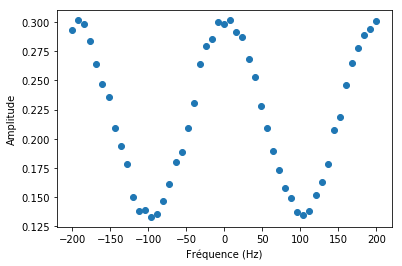

In [13]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
freq, amp = np.loadtxt('data/fit_sinus.dat', unpack=True)
plt.plot(freq, amp, 'o')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')

Text(0.5,0,'Fréquence (Hz)')

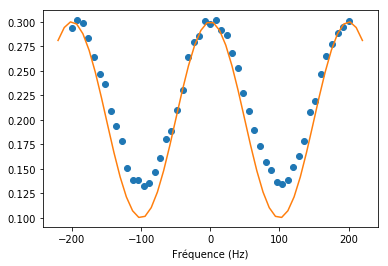

In [14]:
def frange(x, a, b, f_0, Delta_f):
    return a + b*np.cos(2*np.pi*(x-f_0)/Delta_f)

p0 = (0.2, 0.1, 0, 200)

f_plot = np.linspace(-220, 220)

plt.plot(freq, amp, 'o')
plt.plot(f_plot, frange(f_plot, *p0))
plt.xlabel('Fréquence (Hz)')

Text(0.5,0,'Fréquence (Hz)')

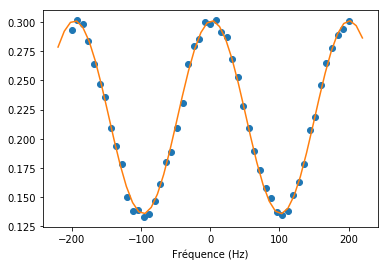

In [15]:
p_opt, p_cov = curve_fit(frange, freq, amp, p0=p0)
plt.plot(freq, amp, 'o')
plt.plot(f_plot, frange(f_plot, *p_opt))
plt.xlabel('Fréquence (Hz)')

In [16]:
a, b, f_0, Delta_f = p_opt
print(f_0)
print(np.sqrt(p_cov[2, 2]))
print(p_cov[2, 2])

2.3676751760478263
0.31641156138612997
0.10011627617880871


# Corrélation
On simule une jeu de données.

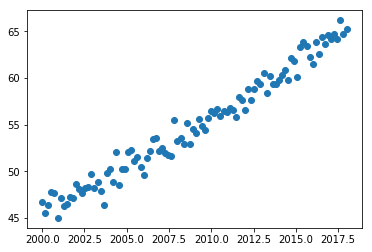

In [17]:
np.random.seed(0) # pour que le générateur "aléatoire" soit le même pour tout le monde
N = 100
x = np.linspace(2000, 2018, N)
y = np.arange(N)*0.2 + 45 + np.random.normal(size=N)

plt.plot(x, y, 'o');

1. Tracez et ajustez les données par une une droite $y=ax+b$.
2. Quel est l’incertitude sur $b$? Qu’en pensez-vous ?
3. Calculez la valeur et l’incertitude de votre fit en $x= 2010$.
4. Trouvez une fonction de fit plus pertinente pour ce problème.

[ 1.08348182e+00 -2.12175517e+03]


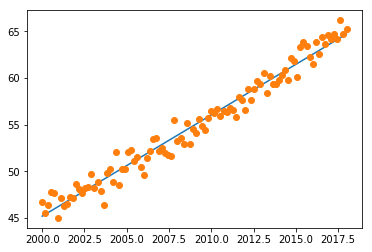

In [18]:
def fit_function(x, a, b):
    return a*x + b

p_opt, cor_mat = curve_fit(fit_function, x, y)
a, b = p_opt
print(p_opt)
plt.plot(x,fit_function(x,*p_opt))
plt.plot(x,y,"o")

In [19]:
sigma = np.sqrt(np.diag(cor_mat))
sigma

array([1.93267668e-02, 3.88276066e+01])

In [20]:
cor_mat/ (sigma[:,np.newaxis]*sigma[np.newaxis, :])

array([[ 1.        , -0.99999659],
       [-0.99999659,  1.        ]])

In [21]:
sigma_a = sigma[0]
sigma_b = sigma[1]

x_test = 2010

In [22]:
print('Valeur en 2010 ', a*x_test + b)

sigma_y = np.sqrt(x_test**2 * sigma_a**2 + sigma_b**2)
print('Incertitude sans correlations', sigma_y)

sigma_y = np.sqrt(x_test**2 * sigma_a**2 + sigma_b**2 + 2*x_test*cor_mat[1, 0])
print('Incertitude avec correlations', sigma_y)

Valeur en 2010  56.04328983428377
Incertitude sans correlations 54.924102159729976
Incertitude avec correlations 0.10325902606783537


In [23]:
def fit_function(x, a, b):
    return a*(x-2000) + b

p_opt, cor_mat = curve_fit(fit_function, x, y)
a, b = p_opt

sigma = np.sqrt(np.diag(cor_mat))
sigma_a = sigma[0]
sigma_b = sigma[1]

x_test = 10

print('Valeur en 2010 ', a*x_test + b)

sigma_y = np.sqrt(x_test**2 * sigma_a**2 + sigma_b**2)
print('Incertitude sans correlations', sigma_y)

sigma_y = np.sqrt(x_test**2 * sigma_a**2 + sigma_b**2 + 2*x_test*cor_mat[1, 0])
print('Incertitude avec correlations', sigma_y)

Valeur en 2010  56.04328985689939
Incertitude sans correlations 0.2790998350851877
Incertitude avec correlations 0.10325894775854742
